In [108]:
import numpy as np
import scipy
from math import sqrt
import sympy as sp
np.set_printoptions(precision=3)
import pandas as pd
%matplotlib inline

In [2]:
df = pd.DataFrame(dict(
        A=[1, 1, 1, 2, 2, 2, 2, 3, 4, 4],
        B=range(10)
    ))

df.groupby('A', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))

,A,B
2,1,2
1,1,1
3,2,3
4,2,4
7,3,7
8,4,8
9,4,9


### Chapter 2

In [3]:

##### Exercise 2
try:
    A = np.array(([4,2,4],[2,2,2],[4,2,3]))
    L= np.linalg.cholesky(A)
except Exception as e: 
    print(e)


Matrix is not positive definite


### Chapter 3

In [4]:

def gram_schmidt_ortho(U):
    '''
    Input arr: array whose gram schmidt orthogonalization needs to be done
    return G : Gram schmidt 
    '''
    row,col = U.shape
    V = U/np.linalg.norm(U,axis=0)
    G = np.zeros([row,col])
    for i in range(col):
        G[:,i]= U[:,i] - np.sum(G[:,:i].T.dot(U[:,i].reshape(row,1)).T.repeat(row,axis =0) * G[:,:i],axis = 1)
        G[:,i] = G[:,i]/np.linalg.norm(G[:,i])
    return G
A = np.array([[2,0,-1,1],[1,2,0,3],[3,0,-1,2]])
print(A)
print(gram_schmidt_ortho(A.T))


[[ 2  0 -1  1]
 [ 1  2  0  3]
 [ 3  0 -1  2]]
[[ 0.816 -0.213  0.195]
 [ 0.     0.638 -0.586]
 [-0.408  0.266  0.716]
 [ 0.408  0.691  0.325]]


### Chapter 4

In [5]:
#### Exeercise 1
Q = sp.Matrix([[3,2,-1,4,1],[0,1,-1,2,2],[1,-3,0,1,2],[4,-3,1,1,-1]])
A = Q.rref()
print(A)
x0, x1, x2, x3, x4 = sp.symbols('x0, x1, x2, x3, x4')
b = sp.Matrix([15,11,11,4])
system = A, b = Q,b
c=sp.linsolve(system, x0, x1, x2, x3, x4)
print('-------Answer---------')
print(c)


## Exercise 5
M = np.array([[2,0,3,1],[0,1,1,1],[5,2,1,1],[2,-1,2,2]])
A = M[0:2,0:2]
B = M[0:2,2:]
C = M[2:,0:2]
D = M[2:,2:]
print(A)
print(B)
print(C)
print(D)
print('---------Answer------')
Y1 = np.array([5,2])
Y2 = np.array([3,5])
C_inverse = np.linalg.inv(C)
X2 =  np.dot(np.linalg.inv(B - np.dot(np.dot(A,C_inverse),D)), (Y1 - np.dot(np.dot(A,C_inverse),Y2)))
print(X2)

(Matrix([
[1, 0, 0,   7/10,  -1/10],
[0, 1, 0,  -1/10,  -7/10],
[0, 0, 1, -21/10, -27/10],
[0, 0, 0,      0,      0]]), (0, 1, 2))
-------Answer---------
FiniteSet((-7*x3/10 + x4/10 + 23/10, x3/10 + 7*x4/10 - 29/10, 21*x3/10 + 27*x4/10 - 139/10, x3, x4))
[[2 0]
 [0 1]]
[[3 1]
 [1 1]]
[[ 5  2]
 [ 2 -1]]
[[1 1]
 [2 2]]
---------Answer------
[1.176 1.   ]


In [6]:

### Exercise 7
A = np.array([[6,5,1,0],[6,5,-1,6],[6,1,1,0],[6,1,-1,2]])
print(A)
Q=gram_schmidt_ortho(A)
print(Q)
Q,R = np.linalg.qr(A)
print(Q)
print(R)



[[ 6  5  1  0]
 [ 6  5 -1  6]
 [ 6  1  1  0]
 [ 6  1 -1  2]]
[[ 0.5  0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5  0.5]
 [ 0.5 -0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5 -0.5]]
[[-0.5 -0.5 -0.5 -0.5]
 [-0.5 -0.5  0.5  0.5]
 [-0.5  0.5 -0.5  0.5]
 [-0.5  0.5  0.5 -0.5]]
[[-12.  -6.   0.  -4.]
 [  0.  -4.   0.  -2.]
 [  0.   0.  -2.   4.]
 [  0.   0.   0.   2.]]


In [7]:
### Multiplying the answer
Q = np.array([[0.5,0.5,0.5,-0.5],[0.5,0.5,-0.5,0.5],[0.5,-0.5,0.5,0.5],[0.5,-0.5,-0.5,-0.5]])
R = np.array([[12,6,0,4],[0,4,-2,2],[0,0,0,-4],[0,0,0,2]])
print('After Multiplication')
A=np.dot(Q,R)
print(A)
Q_calc, R_calc = np.linalg.qr(A)
print(Q_calc)

After Multiplication
[[ 6.  5. -1.  0.]
 [ 6.  5. -1.  6.]
 [ 6.  1.  1.  0.]
 [ 6.  1.  1.  2.]]
[[-5.000e-01 -5.000e-01  7.071e-01 -7.864e-17]
 [-5.000e-01 -5.000e-01 -7.071e-01  4.780e-17]
 [-5.000e-01  5.000e-01  1.164e-16 -7.071e-01]
 [-5.000e-01  5.000e-01 -1.056e-16  7.071e-01]]


In [10]:
R = sp.Matrix([[1,3,2],[4,2,-2],[-4,3,7]])
R.rref()

(Matrix([
 [1, 0, -1],
 [0, 1,  1],
 [0, 0,  0]]), (0, 1))

In [60]:
w = sp.symbols('w')
C = sp.Matrix([[2,0,1,3,2,3],[3,1,0,2,-1,4],[3,-1,3,7,7,1]])


In [186]:
from sympy import *

from sympy.solvers.solveset import linsolve
x1, x2, x3,x4,x5 = symbols('x1, x2, x3,x4,x5')

M = sp.Matrix([[2,0,1,3,2,3],[3,w,0,2,-1,4],[3,-1,3,7,7,1]])

system = A, b = M[:, :-1], M[:, -1]

solutions = linsolve(system, x1, x2,x3,x4,x5 )

list(solutions)

[((8*w - 2*x4*(w - 1) + x5*(w - 1) - 4)/(3*(w - 1)), -4/(w - 1), -(7*w + 5*x4*(w - 1) + 8*x5*(w - 1) + 1)/(3*w - 3), x4, x5)]

In [133]:
# %matplotlib inline
# from sympy.plotting import plot
# plot((7*w + 1)/(3*w-3),(w, 0, 0.9))

M = sp.Matrix([[2,0,1,3,2],[3,w,0,2,-1],[3,-1,3,7,7]])
A = (M.T*M)

In [214]:

from sympy.utilities.lambdify import lambdify, implemented_function
f = lambdify(((w, x4, x5),), list(solutions))

ret=f((np.linspace(0,2,num=3),0,0))
ret[0][1]

<string>:3: RuntimeWarning: divide by zero encountered in true_divide


array([  4., -inf,  -4.])

In [215]:
np.linspace(0,2,num=3)


array([0., 1., 2.])

In [218]:
-4/(0-1)

4.0

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

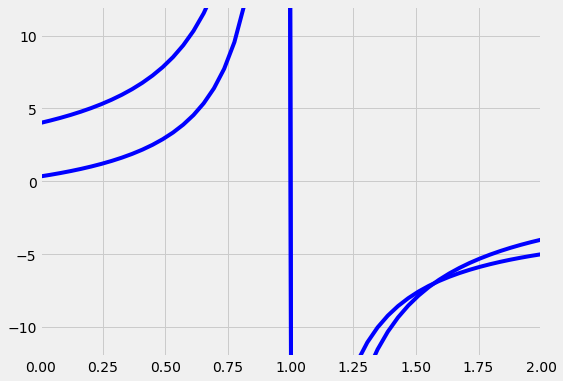

In [219]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
plt.xlim([0,2])
plt.ylim([-12,12])
x = np.linspace(0,2)
y= - (7*x +1)/(3*x -3)
sns.lineplot(x=x,y=y,color ='b')

sns.lineplot(x=x,y=-4/(x-1),color ='b')

In [220]:
np.std([7,7,7,7,7])

0.0